![Cartoon of telecom customers](IMG_8811.png)


The telecommunications (telecom) sector in India is rapidly changing, with more and more telecom businesses being created and many customers deciding to switch between providers. "Churn" refers to the process where customers or subscribers stop using a company's services or products. Understanding the factors that influence keeping a customer as a client in predicting churn is crucial for telecom companies to enhance their service quality and customer satisfaction. As the data scientist on this project, you aim to explore the intricate dynamics of customer behavior and demographics in the Indian telecom sector in predicting customer churn, utilizing two comprehensive datasets from four major telecom partners: Airtel, Reliance Jio, Vodafone, and BSNL:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


In [26]:
# Import libraries and methods/functions
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [27]:
telco_demog = pd.read_csv('telecom_demographics.csv')
telco_usage = pd.read_csv('telecom_usage.csv')
print('data loaded successful')

data loaded successful


In [28]:
churn_df = telco_demog.merge(telco_usage, on='customer_id')
churn_df.head(5)

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,15169,Airtel,F,26,Himachal Pradesh,Delhi,667173,2020-03-16,4,85979,75,21,4532,1
1,149207,Airtel,F,74,Uttarakhand,Hyderabad,313997,2022-01-16,0,69445,35,38,723,1
2,148119,Airtel,F,54,Jharkhand,Chennai,549925,2022-01-11,2,75949,70,47,4688,1
3,187288,Reliance Jio,M,29,Bihar,Hyderabad,230636,2022-07-26,3,34272,95,32,10241,1
4,14016,Vodafone,M,45,Nagaland,Bangalore,188036,2020-03-11,4,34157,66,23,5246,1


In [29]:
churn_rate = churn_df['churn'].value_counts() / len(churn_df)
print(churn_rate)

0    0.799538
1    0.200462
Name: churn, dtype: float64


In [30]:
print(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
 10  calls_made          6500 non-null   int64 
 11  sms_sent            6500 non-null   int64 
 12  data_used           6500 non-null   int64 
 13  churn               6500 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 761.7+ KB
None


In [31]:
churn_df = pd.get_dummies(churn_df, columns=['telecom_partner', 'gender', 'state', 'city', 'registration_event'])

In [32]:
scaler = StandardScaler()

In [33]:
features = churn_df.drop(['customer_id', 'churn'], axis=1)
features_scaled = scaler.fit_transform(features)

In [34]:
target = churn_df['churn']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [36]:
# Instantiate the Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [37]:
logreg_pred = logreg.predict(X_test)

# Logistic Regression evaluation
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


[[920 107]
 [245  28]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1027
           1       0.21      0.10      0.14       273

    accuracy                           0.73      1300
   macro avg       0.50      0.50      0.49      1300
weighted avg       0.67      0.73      0.69      1300



In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Random Forest predictions
rf_pred = rf.predict(X_test)

# Random Forest evaluation
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[1026    1]
 [ 273    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1027
           1       0.00      0.00      0.00       273

    accuracy                           0.79      1300
   macro avg       0.39      0.50      0.44      1300
weighted avg       0.62      0.79      0.70      1300



In [39]:
# Evaluate accuracy on test data
logreg_accuracy = logreg.score(X_test, y_test)
rf_accuracy = rf.score(X_test, y_test)

# Compare and assign the model name with higher accuracy
if logreg_accuracy > rf_accuracy:
    higher_accuracy = "LogisticRegression"
else:
    higher_accuracy = "RandomForest"

# Print the result
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Model with higher accuracy:", higher_accuracy)


Logistic Regression Accuracy: 0.7292307692307692
Random Forest Accuracy: 0.7892307692307692
Model with higher accuracy: RandomForest


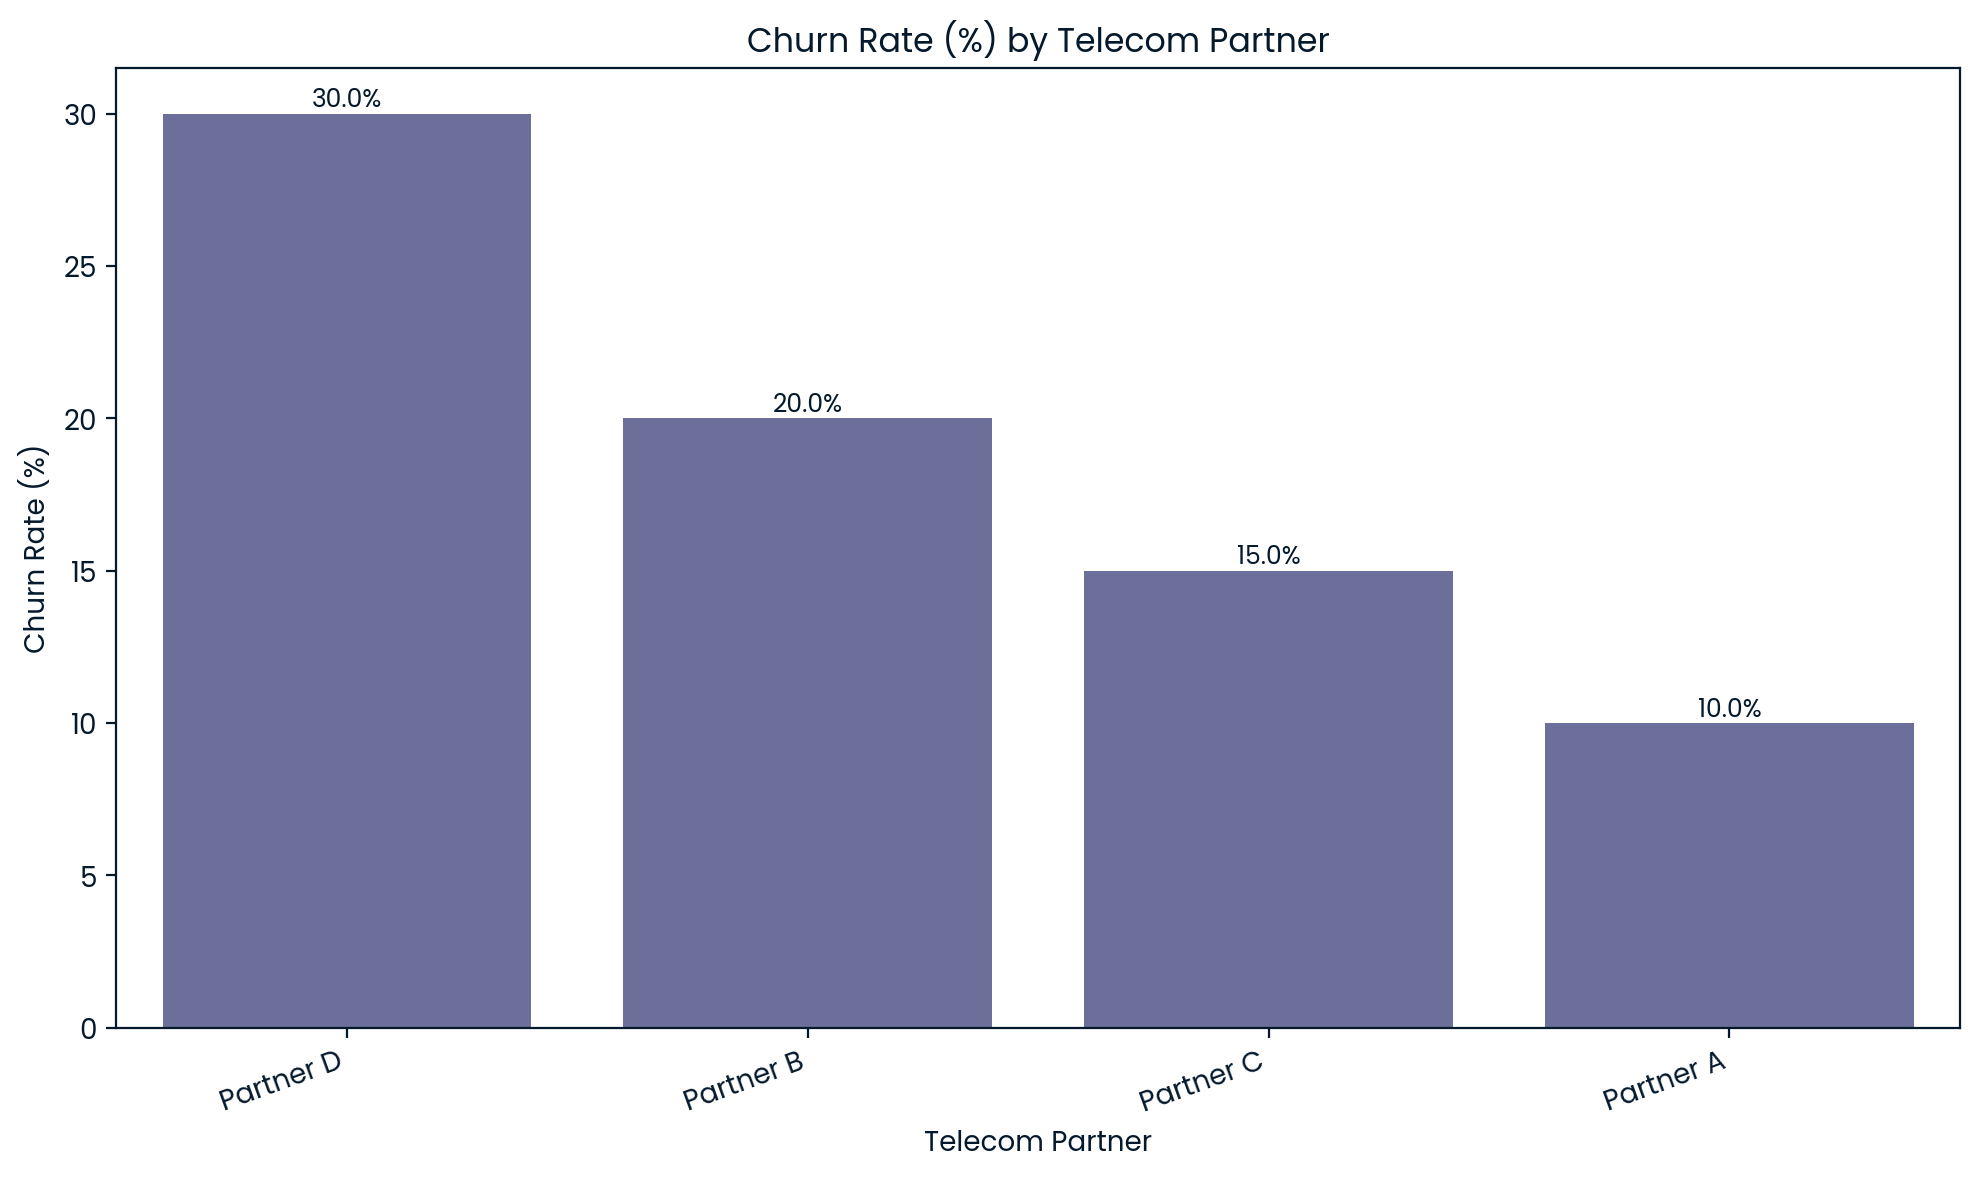

In [6]:
def to01(s):
    if s.dtype.kind in 'biufc':
        return pd.to_numeric(s, errors='coerce').clip(0,1)
    return s.astype(str).str.strip().str.lower().map({
        'yes':1,'y':1,'true':1,'t':1,'1':1,'churn':1,'churned':1,'left':1,'exited':1,
        'no':0,'n':0,'false':0,'f':0,'0':0,'stay':0,'active':0,'retained':0
    })

churn_num = to01(churn_df['churn'])

# --- get partner (original or one-hot) ---
if 'telecom_partner' in churn_df.columns:
    partner = churn_df['telecom_partner'].astype(str)
else:
    partner_cols = [c for c in churn_df.columns if c.startswith('telecom_partner_')]
    if not partner_cols:
        raise ValueError("No telecom_partner column found (neither original nor one-hot).")
    # pick the 1-hot that’s 'on' per row; if multiple 0/1s, idxmax still works
    partner = churn_df[partner_cols].idxmax(axis=1).str.replace('telecom_partner_', '', regex=False)

plot_df = pd.DataFrame({'telecom_partner': partner, 'churn': churn_num}).dropna()

# Limit to top partners by volume (keeps chart readable)
TOP_N = 15
top_partners = plot_df['telecom_partner'].value_counts().head(TOP_N).index
plot_df = plot_df[plot_df['telecom_partner'].isin(top_partners)]

# Compute churn rate (%) per partner
rates = (plot_df.groupby('telecom_partner')['churn'].mean()
         .mul(100).sort_values(ascending=False).reset_index())
plt.figure(figsize=(10,6))
ax = sns.barplot(data=rates, x='telecom_partner', y='churn', ci=None)
plt.title('Churn Rate (%) by Telecom Partner')
plt.xlabel('Telecom Partner')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=20, ha='right')

# value labels
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f'{h:.1f}%', (p.get_x()+p.get_width()/2, h),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()